In [168]:
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt

In [169]:
import seaborn as sns
palette = sns.color_palette('viridis')
palette

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

# Networks

In [171]:
pop = 20 # Population (Number of nodes)
wsG = ig.Graph.Watts_Strogatz(dim=1, size=pop, nei=2, p=0.5)
erG = ig.Graph.Erdos_Renyi(pop, m=2*pop)
baG = ig.Graph.Barabasi(pop, m=2)

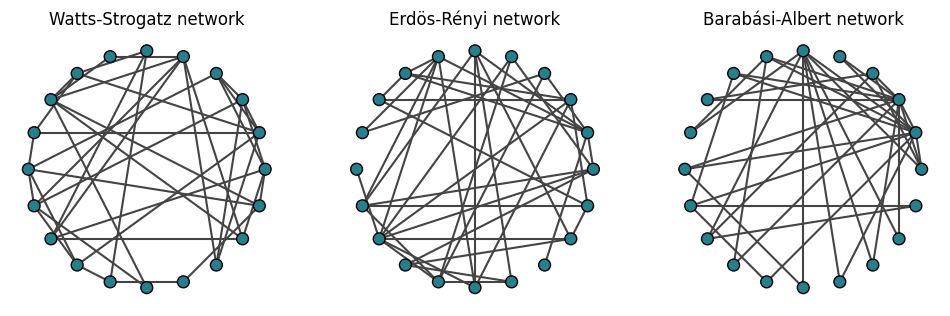

In [183]:
fig, axs = plt.subplots(1,3, figsize=(12, 4))

kwargs = dict(layout = 'circular', vertex_size = 0.1, vertex_color=[palette[2]], edge_width = 1.5)

axs[0].set_title('Watts-Strogatz network')
ig.plot(wsG, target=axs[0], **kwargs)
axs[1].set_title('Erdös-Rényi network')
ig.plot(erG, target=axs[1], **kwargs)
axs[2].set_title('Barabási-Albert network')
ig.plot(baG, target=axs[2], **kwargs)

plt.show()

In [200]:
pop = 1000 # Population (Number of nodes)
wsG = ig.Graph.Watts_Strogatz(dim=1, size=pop, nei=6, p=0.5)
erG = ig.Graph.Erdos_Renyi(pop, m=6*pop)
baG = ig.Graph.Barabasi(pop, m=6)

# Centrality

## Degree

In [201]:
degWS = np.array(wsG.vs.degree())
degER = np.array(erG.vs.degree())
degBA = np.array(baG.vs.degree())

print(f'WS mean degree = {degWS.mean()}')
print(f'ER mean degree = {degER.mean()}')
print(f'BA mean degree = {degBA.mean()}\n')

WS mean degree = 12.0
ER mean degree = 12.0
BA mean degree = 11.958



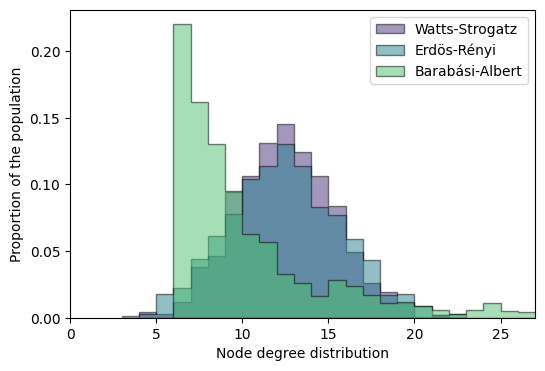

In [202]:
plt.figure(figsize=(6, 4))

kwargs = dict(density = True, alpha = 0.5, histtype='stepfilled', ec = 'black')

plt.hist(degWS, label = 'Watts-Strogatz', bins = degWS.max()-degWS.min(), **kwargs, color=palette[0])
plt.hist(degER, label = 'Erdös-Rényi', bins = degER.max()-degER.min(), **kwargs, color=palette[2])
plt.hist(degBA, label = 'Barabási-Albert', bins = degBA.max()-degBA.min(), **kwargs, color=palette[4])

plt.xlim((0,degWS.max()+5))
plt.xlabel('Node degree distribution')
plt.ylabel('Proportion of the population')

plt.legend()
plt.show()

## Betweeness

In [203]:
betweenWS = np.array(wsG.betweenness())
betweenER = np.array(erG.betweenness())
betweenBA = np.array(baG.betweenness())

print(f'WS mean betweenness = {betweenWS.mean()}')
print(f'ER mean betweenness = {betweenER.mean()}')
print(f'BA mean betweenness = {betweenBA.mean()}\n')

WS mean betweenness = 1024.7169999999999
ER mean betweenness = 1017.4009999999996
BA mean betweenness = 927.7749999999999



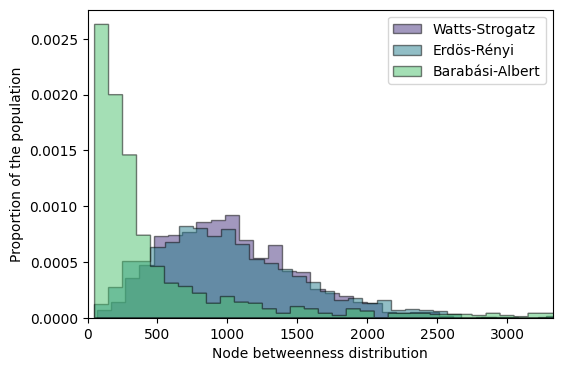

In [204]:
plt.figure(figsize=(6, 4))

kwargs = dict(density = True, alpha = 0.5, histtype='stepfilled', ec = 'black')

binsWS = int(betweenWS.max()-betweenWS.min())//100
binsER = int(betweenER.max()-betweenER.min())//100
binsBA = int(betweenBA.max()-betweenBA.min())//100

plt.hist(betweenWS, label = 'Watts-Strogatz', bins = binsWS, **kwargs, color=palette[0])
plt.hist(betweenER, label = 'Erdös-Rényi', bins = binsER, **kwargs, color=palette[2])
plt.hist(betweenBA, label = 'Barabási-Albert', bins = binsBA, **kwargs, color=palette[4])

plt.xlim((0,int(betweenWS.max())))
plt.xlabel('Node betweenness distribution')
plt.ylabel('Proportion of the population')

plt.legend()
plt.show()

## Diameter

In [205]:
print(f'The diameter of WS graph is: {wsG.diameter()}')
print(f'The diameter of ER graph is: {erG.diameter()}')
print(f'The diameter of BA graph is: {baG.diameter()}\n')

The diameter of WS graph is: 5
The diameter of ER graph is: 5
The diameter of BA graph is: 5



# Epidemiologic simulation within contact networks

In [ ]:
def simEpi(time, G):
    
    beta = 0.022              # Infection probability from infected node to susceptible node    
    pop = G.vcount()          # Get number of nodes (Population)
    G.vs["state"] = "S"       # Set nodes as Susceptible state
    G.vs["duration"] = 0      # Set the infected time of the nodes to 0

    initInfec = 1             # Number of infected nodes at the start of the simulation

    # Set the inital infected nodes as node state
    for i in range(0,initInfec):
    i = np.random.randint(0, pop-init_inf)  # select seed node at random
    G1.vs[i]["state"] = "E"   # set seed node to exposed

    init_inf = 1   
    nb_S = [pop-init_inf]      # no. of susceptibles
    nb_E= [1]                  # no. of exposed with strain 1
    nb_I = [0]                 # no. of infected with strain 1
    nb_R = [0]                 # no. of recovered from strain 1
    nb_E2 = [0]                # no. of exposed with strain 2
    nb_I2 = [0]                # no. of infecteds with strain 2
    nb_R2 = [0]                # no. of recovered from strain 2
    
    max_deg_I = []
    tot_deg_I = []
    
    init_str_2 = 1     # initial number of strain 2 set to E2
    sto = []           # to save graphs for analysis
    for time in range(Time):                      #no. of days 
        res = simulation_bulk(G1, beta)
        sto.append(res)

        nb_S.append(len(sto[time].vs.select(state_eq = "S"))) #no. of susceptibles
        nb_E.append(len(sto[time].vs.select(state_eq = "E"))) #no. of recovereds with strain 1
        nb_I.append(len(sto[time].vs.select(state_eq = "I"))) #no. of infecteds with strain 1
        nb_R.append(len(sto[time].vs.select(state_eq = "R"))) #no. of recovereds from strain 1

        if len(sto[time].vs.select(state_eq = "I")) > 0: # if there are infecteds
            max_deg_I.append(max(sto[time].vs.select(state_eq = "I").degree())) # find max no. of neighbours within infecteds
            tot_deg_I.append(sum(sto[time].vs.select(state_eq = "I").degree())) # find total no. of neighbours within infecteds
        else:
            max_deg_I.append(0)

    return(nb_S,nb_E,nb_I,nb_R,G1,max_deg_I,tot_deg_I) #

In [210]:
np.random.randint(0, 20, size = 10)

array([ 9, 15, 18, 19, 16, 11, 13, 17, 15,  4])

In [215]:
print(range(5))

range(0, 5)
